First few rows of the DataFrame:
   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     

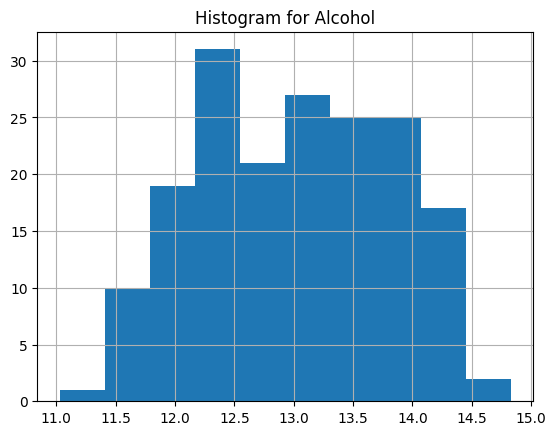

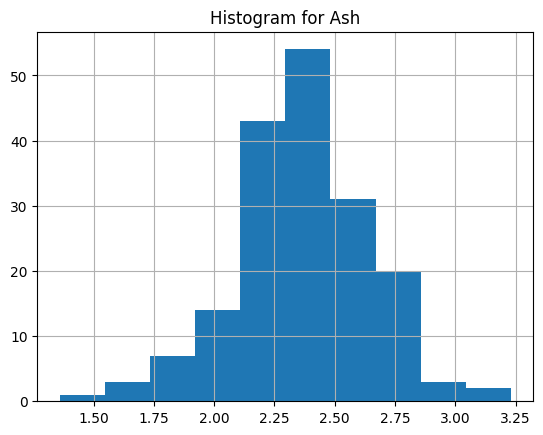

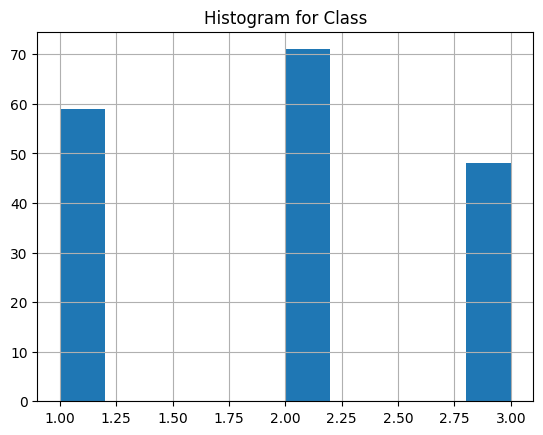

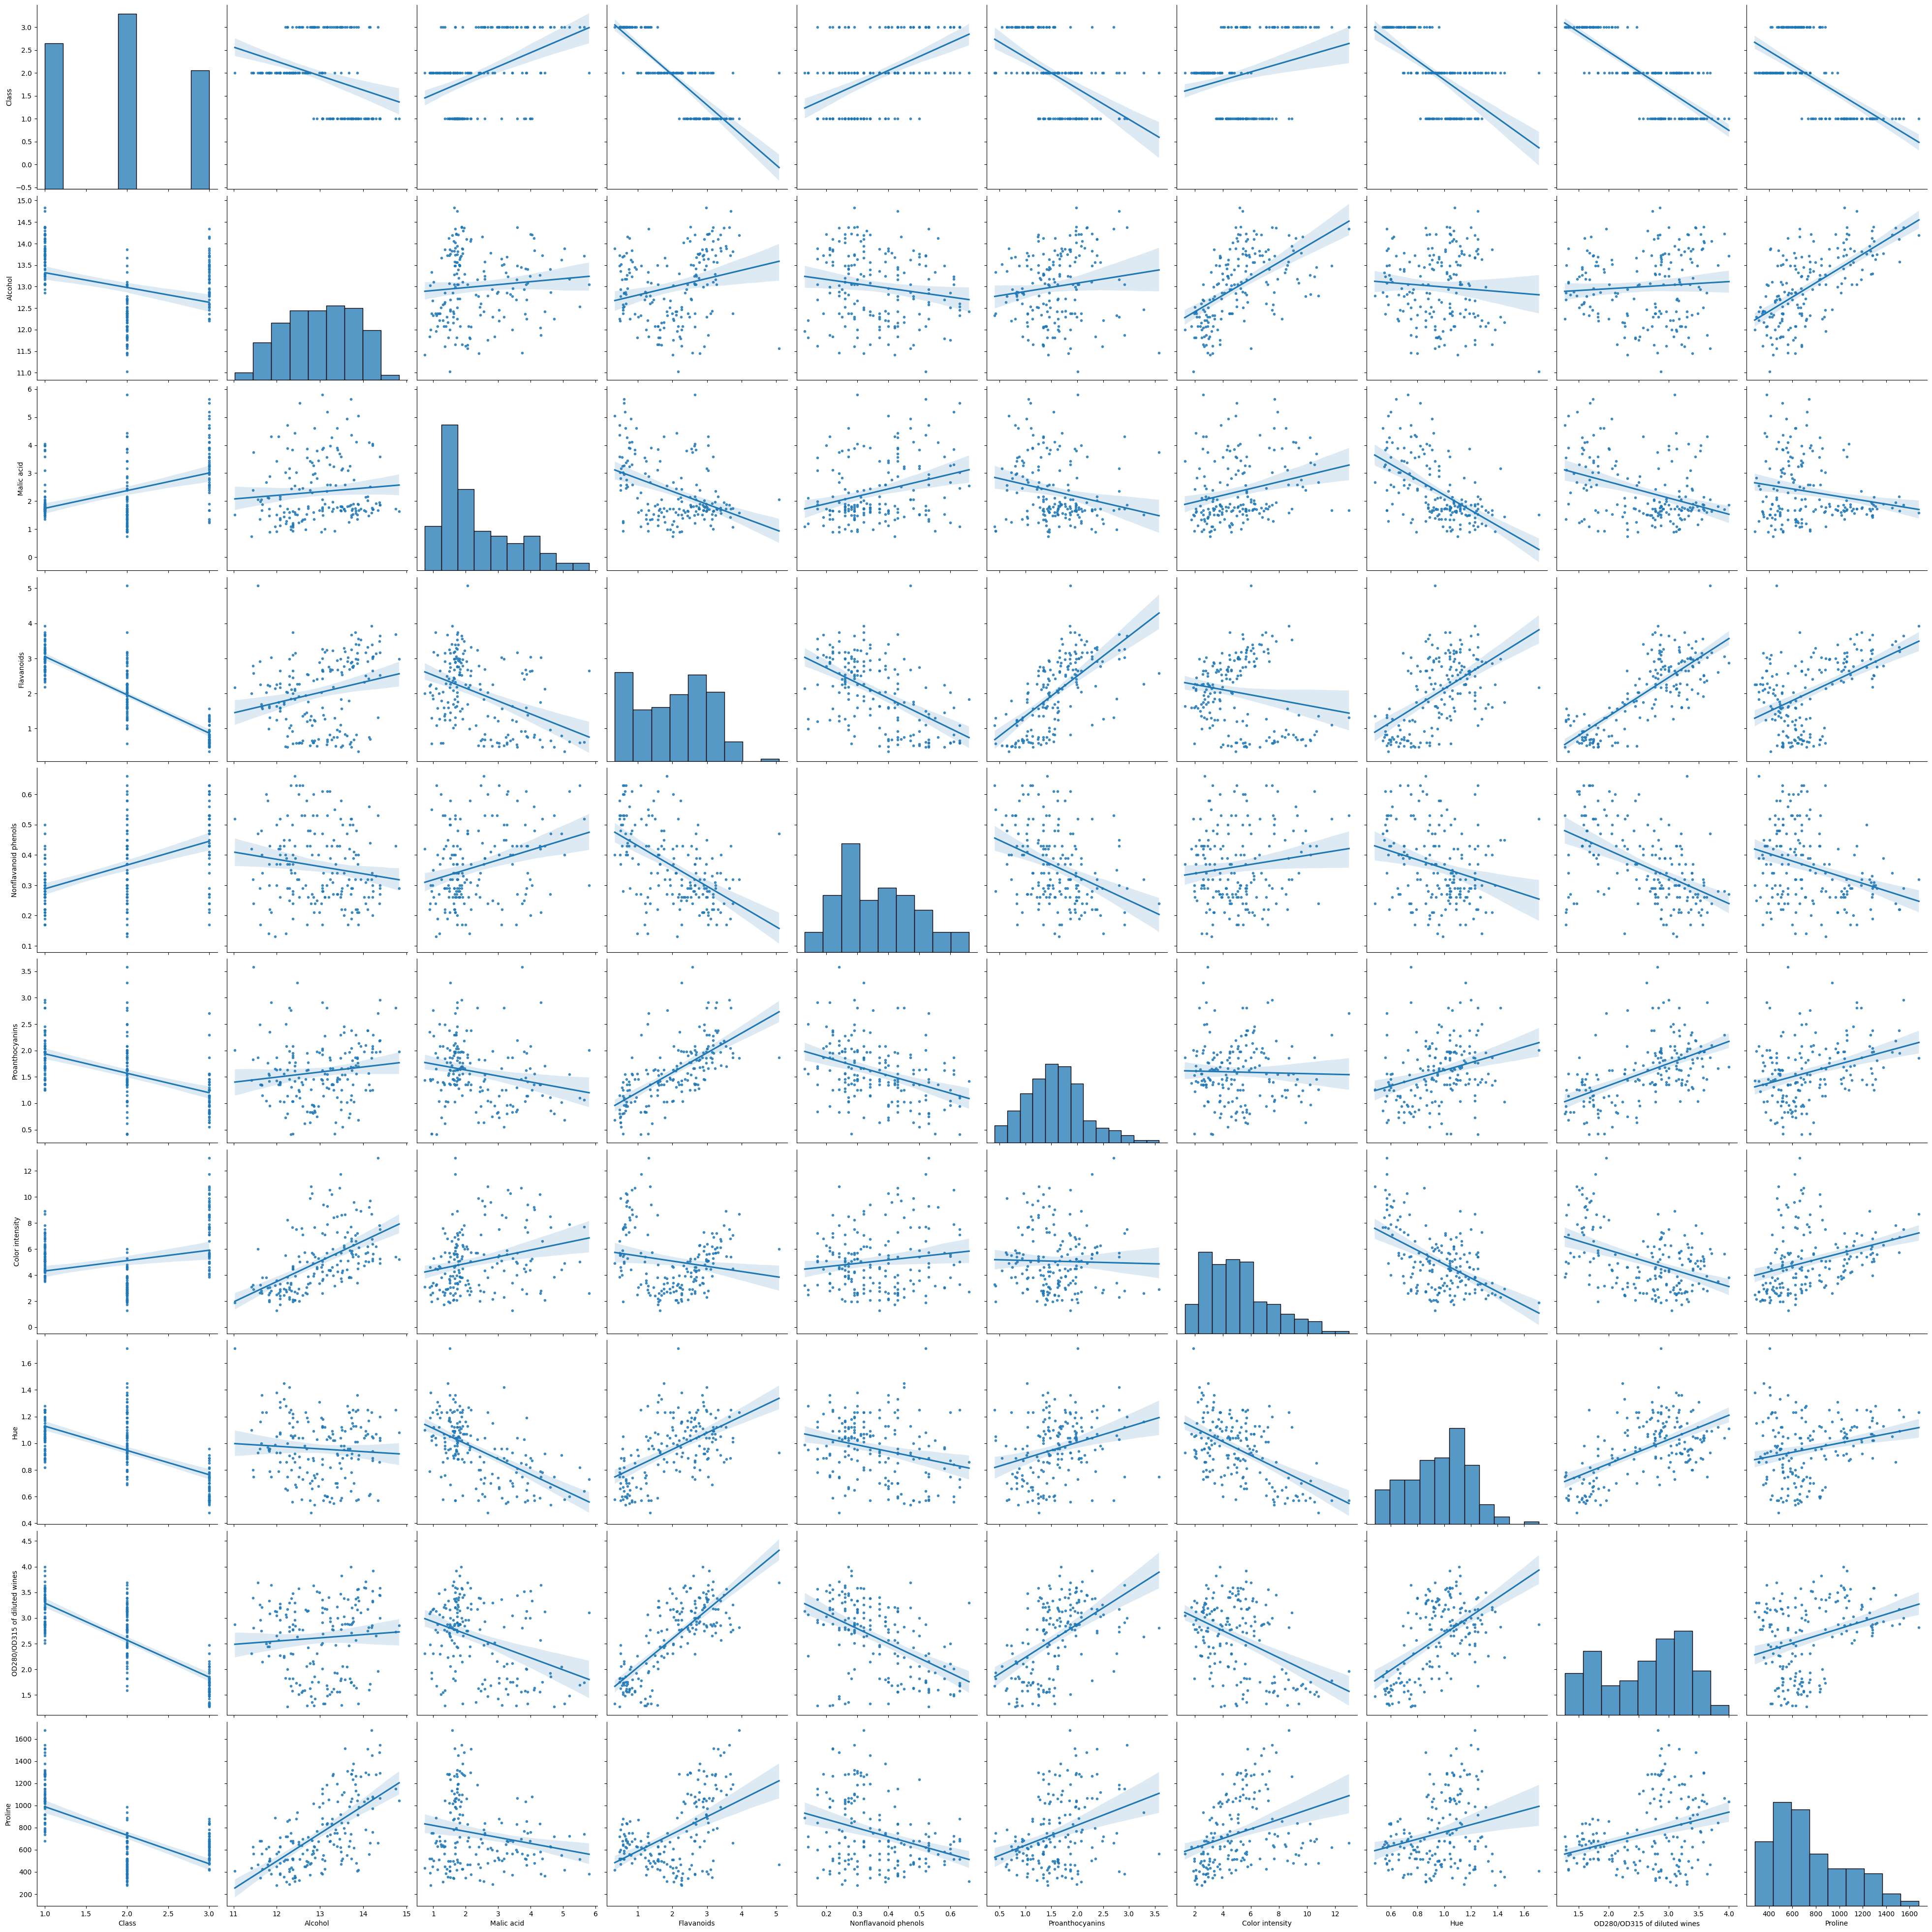

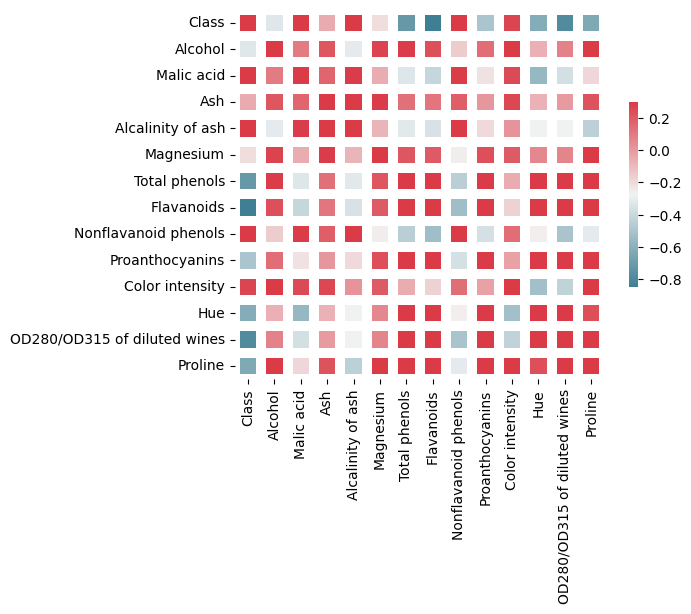

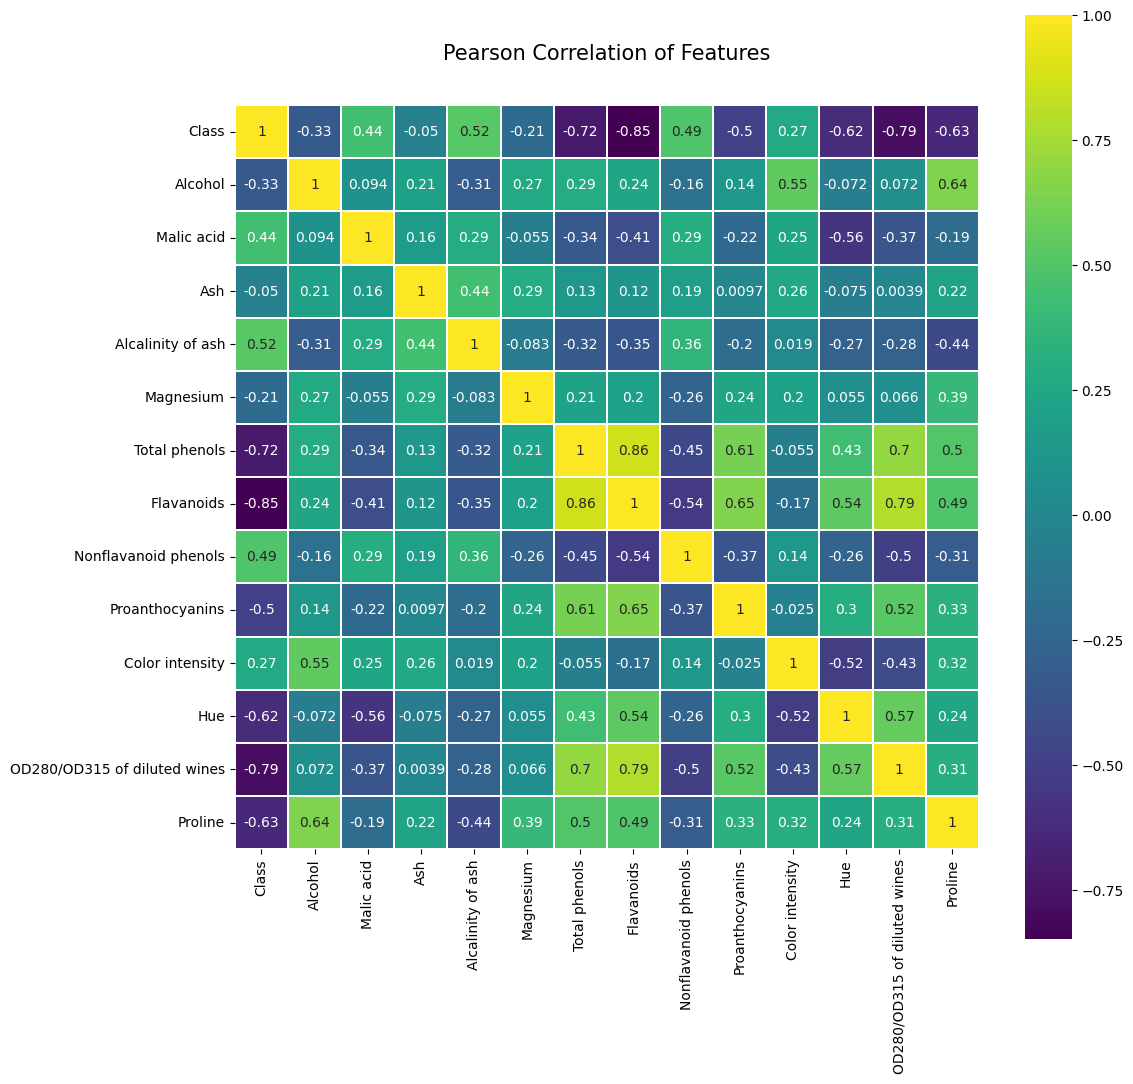

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine.csv')

# Assign attribute names
attributes = ["Class", "Alcohol", "Malic acid", "Ash",
              "Alcalinity of ash", "Magnesium", "Total phenols",
              "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
              "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df.columns = attributes

# Print the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display statistical insights
print("\nStatistical insights of the dataset:")
print(df.describe())

# Visualize 'Alcohol' using a histogram
df.hist('Alcohol')
plt.title("Histogram for Alcohol")
plt.show()

# Visualize 'Ash' using a histogram
df.hist('Ash')
plt.title("Histogram for Ash")
plt.show()

# Visualize 'Class' using a histogram
df.hist('Class')
plt.title("Histogram for Class")
plt.show()

# Create pair plots
dfn = df[["Class", "Alcohol", "Malic acid", "Flavanoids",
          "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
          "Hue", "OD280/OD315 of diluted wines", "Proline"]]
sns.pairplot(dfn, height=4, kind="reg", markers=".")
plt.show()

# Generate a correlation matrix and visualize it using a heatmap
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, square=True, linewidths=6, cbar_kws={"shrink": .5})
plt.show()

# Detailed correlation matrix
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.viridis, linecolor='white', annot=True)
plt.show()


In [6]:
# Separate features and target variable
y = df['Class']
X = df.drop(columns=['Class'])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [7]:
# Create RandomForestClassifier model
classifier = RandomForestClassifier(n_jobs=2, random_state=42)

# Fit the model to training data
classifier.fit(X_train, y_train)

# Predict the target variable
y_pred = classifier.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
[[20  0  0]
 [ 0 24  0]
 [ 0  0 15]]
